# ChEMBL data preparation

Fetching and inspecting ChEMBL compound data that will be used throughout the project.

## Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  #set this to False if you want PNGs instead of SVGs

from chembl_webresource_client.new_client import new_client

## Single molecules tests

In [4]:
molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

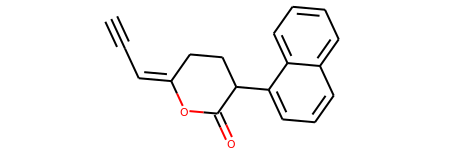

In [22]:
# load and visualize an example compound
mol_smi = light_molecules[0]["molecule_structures"]["canonical_smiles"]
mol = Chem.MolFromSmiles(mol_smi)
mol

In [19]:
# check that SMILES come in a canonical format
mol_smi

'C#C/C=C1\\CCC(c2cccc3ccccc23)C(=O)O1'

In [20]:
Chem.CanonSmiles(mol_smi)

'C#C/C=C1\\CCC(c2cccc3ccccc23)C(=O)O1'

## Load all ChEMBL compounds

In [37]:
molecules = []
for m in molecule.filter(molecule_structures__isnull=True)[:1000]:
    m_json = {}
    m_json["molecule_chembl_id"] = m["molecule_chembl_id"]
    try:
        m_json.update(m["molecule_properties"])
    except TypeError:
        continue
    m_json["canonical_smiles"] = m["molecule_structures"]["canonical_smiles"]
    molecules.append(m_json)


TypeError: 'NoneType' object is not subscriptable

In [48]:
mol_structures = molecule.filter(molecule_structures__isnull=False) \
    .only(["molecule_chembl_id", "molecule_properties", "molecule_structures__canonical_smiles"])

In [49]:
mol_structures[0]

{'molecule_chembl_id': 'CHEMBL6329',
 'molecule_properties': {'alogp': '2.11',
  'aromatic_rings': 3,
  'cx_logd': '2.69',
  'cx_logp': '3.63',
  'cx_most_apka': '6.48',
  'cx_most_bpka': None,
  'full_molformula': 'C17H12ClN3O3',
  'full_mwt': '341.75',
  'hba': 5,
  'hba_lipinski': 6,
  'hbd': 1,
  'hbd_lipinski': 1,
  'heavy_atoms': 24,
  'molecular_species': 'ACID',
  'mw_freebase': '341.75',
  'mw_monoisotopic': '341.0567',
  'num_lipinski_ro5_violations': 0,
  'num_ro5_violations': 0,
  'psa': '84.82',
  'qed_weighted': '0.74',
  'ro3_pass': 'N',
  'rtb': 3},
 'molecule_structures': {'canonical_smiles': 'Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl',
  'molfile': '\n     RDKit          2D\n\n 24 26  0  0  0  0  0  0  0  0999 V2000\n    5.2792   -2.0500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.7917   -2.3500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    5.2792   -1.4500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.3125   -2.0500    0.0000 N   0  0

In [34]:
pd.DataFrame(molecules)

,alogp,aromatic_rings,cx_logd,cx_logp,cx_most_apka,cx_most_bpka,full_molformula,full_mwt,hba,hba_lipinski,...,molecular_species,mw_freebase,mw_monoisotopic,num_lipinski_ro5_violations,num_ro5_violations,psa,qed_weighted,ro3_pass,rtb,canonical_smiles
0,2.11,3,2.69,3.63,6.48,None,C17H12ClN3O3,341.75,5,6,...,ACID,341.75,341.0567,0,0,84.82,0.74,N,3,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,1.33,3,1.82,2.88,6.33,None,C18H12N4O3,332.32,6,7,...,ACID,332.32,332.0909,0,0,108.61,0.73,N,3,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,2.27,3,2.64,3.70,6.33,None,C18H16ClN3O3,357.80,5,6,...,ACID,357.80,357.0880,0,0,87.98,0.75,N,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,1.46,3,1.97,3.02,6.33,None,C17H13N3O3,307.31,5,6,...,ACID,307.31,307.0957,0,0,84.82,0.74,N,3,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,2.11,3,2.57,3.63,6.33,None,C17H12ClN3O3,341.75,5,6,...,ACID,341.75,341.0567,0,0,84.82,0.74,N,3,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.87,2,2.98,2.98,None,None,C32H45N3O10,631.72,10,13,...,NEUTRAL,631.72,631.3105,2,1,134.33,0.35,N,13,COc1cc(C(=O)N2CCN(C(=O)c3cc(OC)c(OC)c(OC)c3)C(...
96,3.62,2,2.69,2.69,None,None,C31H43N3O10,617.70,10,13,...,NEUTRAL,617.70,617.2948,2,1,134.33,0.36,N,13,CCCC(C)NC(=O)OCC1CN(C(=O)c2cc(OC)c(OC)c(OC)c2)...
97,0.87,1,-1.18,0.34,None,8.89,C16H24N4O,288.40,4,5,...,BASE,288.40,288.1950,0,0,48.47,0.90,N,3,O=C(C1CCCCN1)N1CCN(Cc2cccnc2)CC1
98,0.95,1,-2.50,0.65,None,10.93,C15H24N4,260.38,4,4,...,BASE,260.38,260.2001,0,0,31.40,0.87,N,4,c1cncc(CN2CCN(C[C@@H]3CCCN3)CC2)c1


In [30]:
molecule[3999]

{'atc_classifications': [],
 'availability_type': -1,
 'biotherapeutic': None,
 'black_box_warning': 0,
 'chebi_par_id': None,
 'chirality': -1,
 'cross_references': [],
 'dosed_ingredient': False,
 'first_approval': None,
 'first_in_class': -1,
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': -1,
 'max_phase': 0,
 'molecule_chembl_id': 'CHEMBL8930',
 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL8930',
  'parent_chembl_id': 'CHEMBL8930'},
 'molecule_properties': {'alogp': '4.82',
  'aromatic_rings': 2,
  'cx_logd': '2.68',
  'cx_logp': '5.36',
  'cx_most_apka': '4.66',
  'cx_most_bpka': None,
  'full_molformula': 'C32H45N3O5',
  'full_mwt': '551.73',
  'hba': 4,
  'hba_lipinski': 8,
  'hbd': 4,
  'hbd_lipinski': 4,
  'heavy_atoms': 40,
  'molecular_species': 'ACID',
  'mw_freebase': '551.73',
  'mw_monoisotopic': '551.3359',
  'num_lipinski_ro5_violations': 1,
  'num_ro5_violations': 1,
  'psa': '124.60',
  'qed_weighted': '0.27',
  'ro3_pass': 'N',
  'rtb':